In [1]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

In [2]:
def BrownianTrajectories(x, N, K, T):
    d = len(x)
    B = np.zeros((d, K+1, N))
    h = T/K
    t = np.array([i*h for i in range(K+1)])
    for w in range(N):
        B[:, 0, w] = x
        for n in range(1, K+1):
            B[:, n, w] = B[:, n-1, w] + np.sqrt(h) * np.random.normal(size=d)
    return t, h, B

def SDEEuler(x, N, K, T, b, s):
    X = np.zeros((1, K+1, N))
    h = T/K
    t = np.array([i*h for i in range(K+1)])
    for w in range(N):
        X[0, 0, w] = x
        for n in range(1, K+1):
            X[0, n, w] = X[0, n-1, w] + b(X[0, n-1, w])*h + s(X[0, n-1, w]) * np.random.normal(0, h)
    return t, h, X

In [10]:
def animateMB(t, B, figsize, showtrajectories, particle, labelvalues, xlabel, ylabel, labelfontsize, grid, color, linewidth, blit, interval, name, ext, fps):
    steps = len(B[0, :, 0])
    d = len(B[:, 0, 0])
    fig = plt.figure(figsize=figsize)
    camera = Camera(fig)
    if grid:
        plt.grid()
    if d == 1:
        maxB = max(B[0, :, :].flatten())
        minB = min(B[0, :, :].flatten())
        lim = max(maxB, -minB)
        plt.ylim(-lim, lim)
        plt.xlim(0, t[-1])
        if not labelvalues:
            plt.xticks([])
            plt.yticks([])
        if xlabel:
            plt.xlabel(xlabel, fontsize=labelfontsize)
        if ylabel:
            plt.ylabel(ylabel, fontsize=labelfontsize)
        for i in range(steps):
            if color == 'False':
                plt.plot(t[:i], B[0, :i], linewidth=linewidth)
            else:
                plt.plot(t[:i], B[0, :i], color=color, linewidth=linewidth)
            camera.snap()
        anim = camera.animate(blit=blit, interval=interval)
        anim.save(name+'.'+ext, writer='Pillow', fps=fps)
        
    elif d == 2:
        maxB1 = max(B[0, :, :].flatten())
        minB1 = min(B[0, :, :].flatten())
        lim1 = max(maxB1, -minB1)
        maxB2 = max(B[1, :, :].flatten())
        minB2 = min(B[1, :, :].flatten())
        lim2 = max(maxB2, -minB2)
        lim = max(lim2, lim1)
        plt.xlim(-lim, lim)
        plt.ylim(-lim, lim)
        if not labelvalues:
            plt.xticks([])
            plt.yticks([])
        if xlabel:
            plt.xlabel(xlabel, fontsize=labelfontsize)
        if ylabel:
            plt.ylabel(ylabel, fontsize=labelfontsize)
        for i in range(steps):
            if showtrajectories:
                plt.plot(B[0, :i], B[1, :i], color=color)
            if particle:
                plt.plot(B[0, i-1], B[1, i-1], '.', color='black', linewidth=7, markersize=10)
            camera.snap()
        anim = camera.animate(blit=blit, interval=interval)
        anim.save(name+'.'+ext, fps=fps)

# Trayectorias brownianas

MovieWriter Pillow unavailable; using Pillow instead.


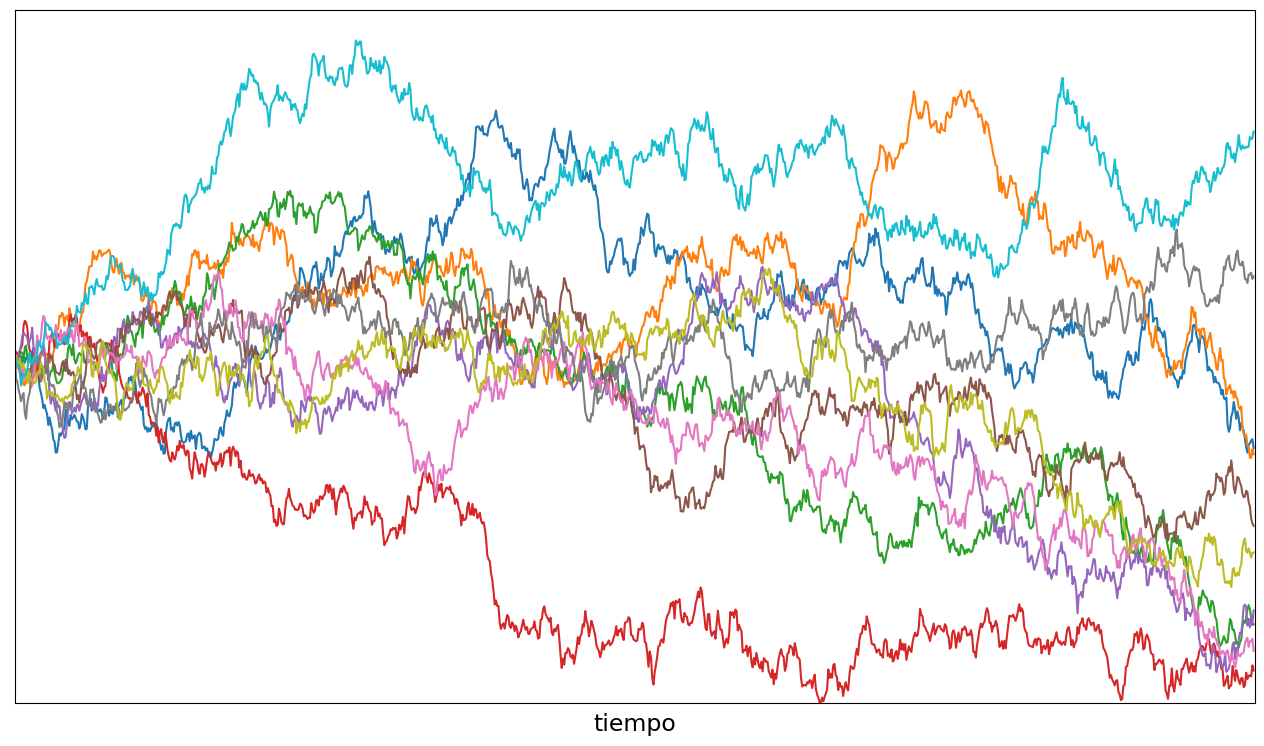

In [19]:
x = np.array([0])
N = 10
K = 1000
T = 1
t, h, B = BrownianTrajectories(x, N, K, T)

animateMB(t=t,
          B=B,
          figsize=(16, 9),
          showtrajectories=False,
          particle=True,
          labelvalues=False,
          xlabel='tiempo',
          ylabel=False,
          labelfontsize=17,
          grid=True,
          color='blue',
          linewidth=1.5,
          blit=False,
          interval=20,
          name='1DMB-2',
          ext='gif',
          fps=55)

# Movimientos brownianos geométricos

MovieWriter Pillow unavailable; using Pillow instead.


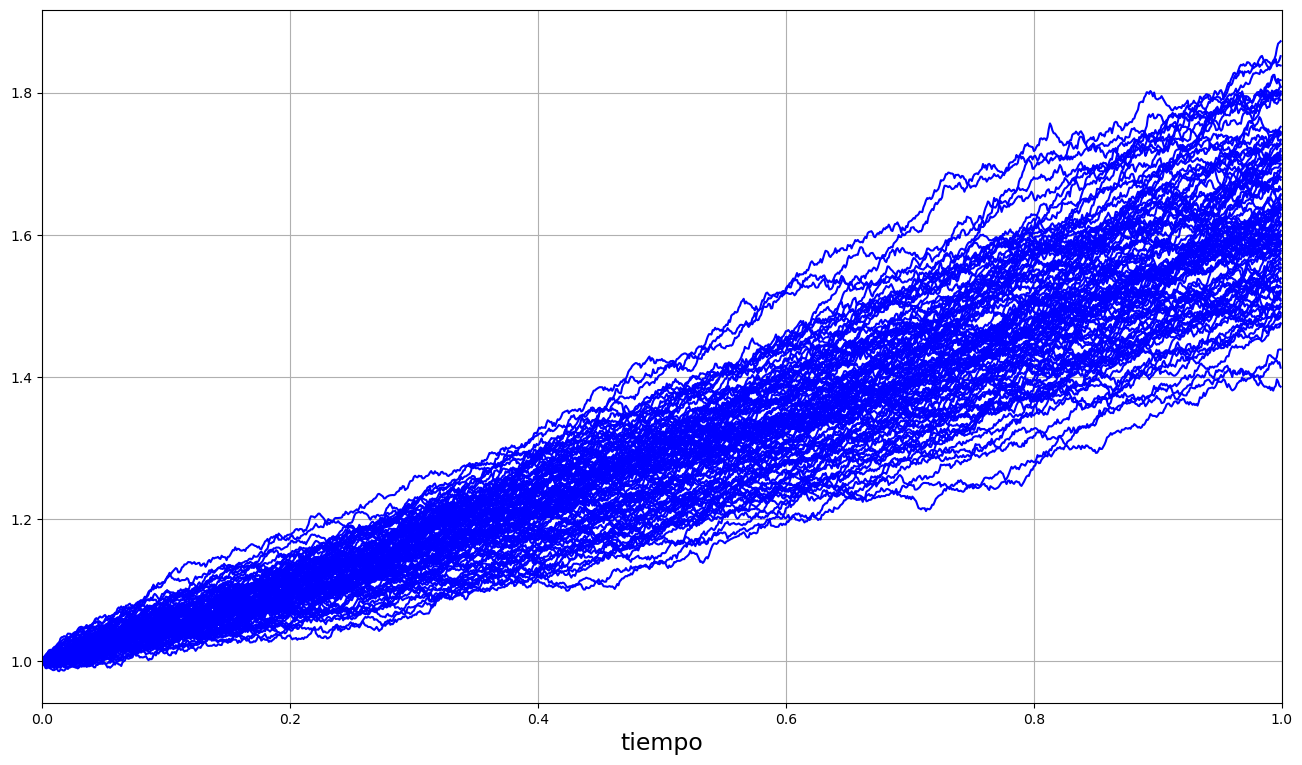

In [10]:
x = 1
N = 100
K = 1000
T = 1
b = lambda x: 0.5*x
s = lambda x: 2*x
t, h, X = SDEEuler(x, N, K, T, b, s)

animateMB(t=t,
          B=X,
          figsize=(16, 9),
          showtrajectories=False,
          particle=True,
          labelvalues=True,
          xlabel='tiempo',
          ylabel=False,
          labelfontsize=17,
          grid=True,
          color='blue',
          linewidth=1.5,
          blit=False,
          interval=20,
          name='1DGMB',
          ext='gif',
          fps=55)

# Movimientos brownianos 2-dimensionales

## Propiedad de Markov

MovieWriter ffmpeg unavailable; using Pillow instead.


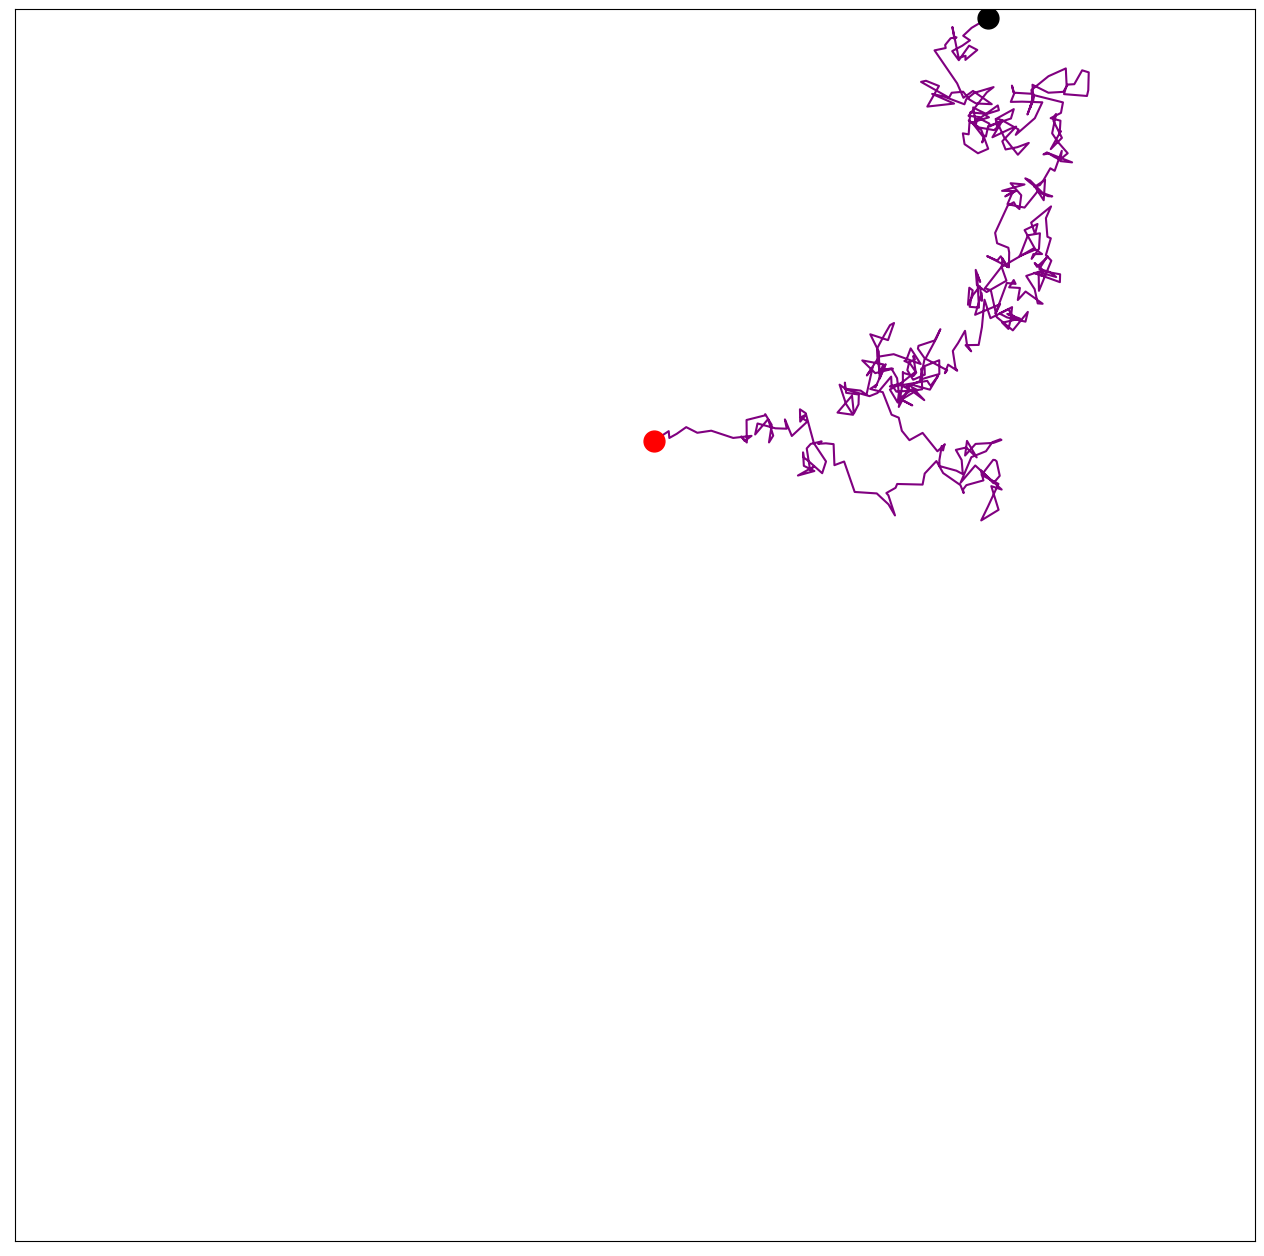

In [64]:
np.random.seed(42)
x = np.array([0, 0])
N = 1
K = 1000 
T = 1
t, h, B = BrownianTrajectories(x, N, K, T)
steps = len(B[0, :, 0])
xnew = B[:, int(steps/2), :]
fig = plt.figure(figsize=(16, 16))
camera = Camera(fig)

maxB1 = max(B[0, :, :].flatten())
minB1 = min(B[0, :, :].flatten())
lim1 = max(maxB1, -minB1)
maxB2 = max(B[1, :, :].flatten())
minB2 = min(B[1, :, :].flatten())
lim2 = max(maxB2, -minB2)
lim = max(lim2, lim1)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.xticks([])
plt.yticks([])

plt.plot(B[0, 0], B[1, 0], '.', color='black', markersize=30)
camera.snap()

for i in range(1, int(steps/2)):
    plt.plot(B[0, :i], B[1, :i], color='blue')
    plt.plot(B[0, i-1], B[1, i-1], '.', color='black', markersize=30)
    camera.snap()
    
for i in range(int(steps/2)):
    plt.plot(B[0, :int(steps/2)+1], B[1, :int(steps/2)+1], color='blue')
    plt.plot(xnew[0], xnew[1], '.', color='red', markersize=30)
    camera.snap()

for i in range(int(steps/2)+1, steps):
    plt.plot(B[0, int(steps/2):i], B[1, int(steps/2):i], color='purple')
    plt.plot(xnew[0], xnew[1], '.', color='red', markersize=30)
    plt.plot(B[0, i-1], B[1, i-1], '.', color='black', markersize=30)
    camera.snap()
anim = camera.animate(blit=False, interval=20)
anim.save('Markov-property.gif', fps=60)

## Equiprobabilidad de las direcciones de movimiento

MovieWriter ffmpeg unavailable; using Pillow instead.


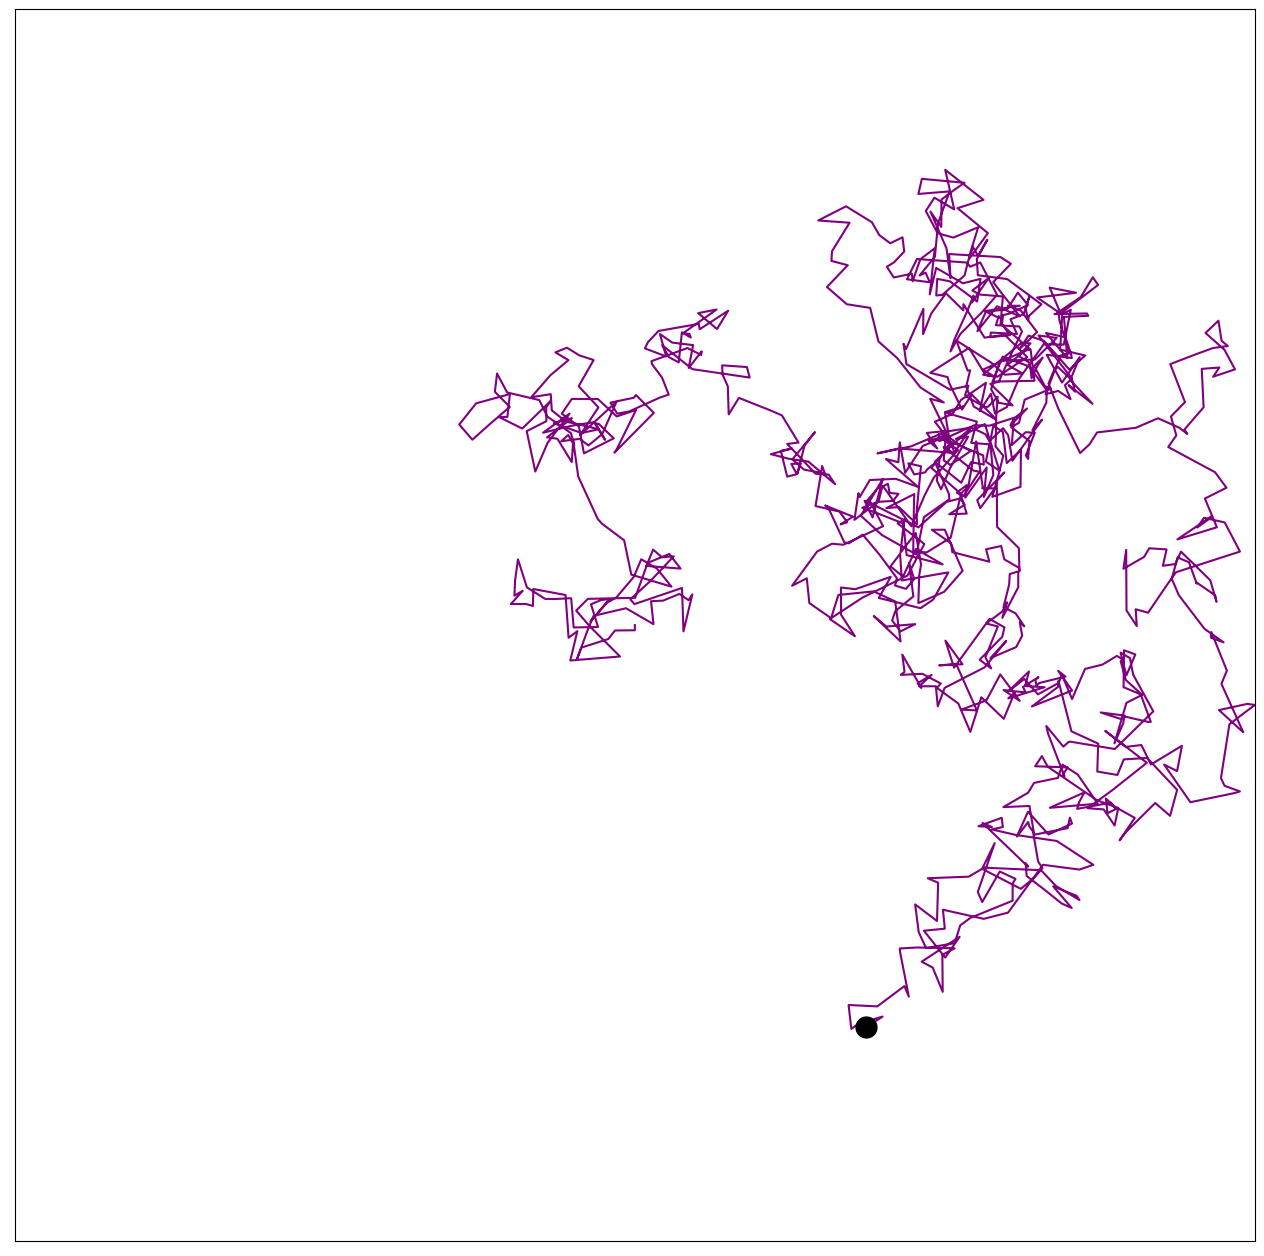

In [7]:
np.random.seed(9)
x = np.array([0, 0])
N = 1
K = 1000
pausas = [10, 30]
pausas = [150, 300, 450, 600, 750, 900]
T = 1
t, h, B = BrownianTrajectories(x, N, K, T)
width = 0.01
dx = 0.05
color = 'blue'
steps = len(B[0, :, 0])
fig = plt.figure(figsize=(16, 16))
camera = Camera(fig)

maxB1 = max(B[0, :, :].flatten())
minB1 = min(B[0, :, :].flatten())
lim1 = max(maxB1, -minB1)
maxB2 = max(B[1, :, :].flatten())
minB2 = min(B[1, :, :].flatten())
lim2 = max(maxB2, -minB2)
lim = max(lim2, lim1)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.xticks([])
plt.yticks([])

for j in range(120):
    plt.plot(B[0, 0], B[1, 0], '.', color='black', markersize=30)
    plt.arrow(B[0, 0, 0], B[1, 0, 0], dx, 0.0, width=width, color=color)
    plt.arrow(B[0, 0, 0], B[1, 0, 0], 0.0, dx, width=width, color=color)
    plt.arrow(B[0, 0, 0], B[1, 0, 0], -dx, 0.0, width=width, color=color)
    plt.arrow(B[0, 0, 0], B[1, 0, 0], 0.0, -dx, width=width, color=color)
    plt.arrow(B[0, 0, 0], B[1, 0, 0], dx, dx, width=width, color=color)
    plt.arrow(B[0, 0, 0], B[1, 0, 0], -dx, dx, width=width, color=color)
    plt.arrow(B[0, 0, 0], B[1, 0, 0], dx, -dx, width=width, color=color)
    plt.arrow(B[0, 0, 0], B[1, 0, 0], -dx, -dx, width=width, color=color)
    camera.snap()

for i in range(1, steps):
    if i in pausas:
        for j in range(120):
            plt.arrow(B[0, i-1, 0], B[1, i-1, 0], dx, 0.0, width=width, color=color)
            plt.arrow(B[0, i-1, 0], B[1, i-1, 0], 0.0, dx, width=width, color=color)
            plt.arrow(B[0, i-1, 0], B[1, i-1, 0], -dx, 0.0, width=width, color=color)
            plt.arrow(B[0, i-1, 0], B[1, i-1, 0], 0.0, -dx, width=width, color=color)
            plt.arrow(B[0, i-1, 0], B[1, i-1, 0], dx, dx, width=width, color=color)
            plt.arrow(B[0, i-1, 0], B[1, i-1, 0], -dx, dx, width=width, color=color)
            plt.arrow(B[0, i-1, 0], B[1, i-1, 0], dx, -dx, width=width, color=color)
            plt.arrow(B[0, i-1, 0], B[1, i-1, 0], -dx, -dx, width=width, color=color)
            plt.plot(B[0, :i], B[1, :i], color='purple')  # trayectoria
            plt.plot(B[0, i-1], B[1, i-1], '.', color='black', markersize=30)
            camera.snap()
    else:
        plt.plot(B[0, :i], B[1, :i], color='purple')
        plt.plot(B[0, i-1], B[1, i-1], '.', color='black', markersize=30)
        camera.snap()
        
anim = camera.animate(blit=False, interval=20)
anim.save('Markov-property.gif', fps=60)

## Simulación de partículas de gas en 2D

MovieWriter ffmpeg unavailable; using Pillow instead.


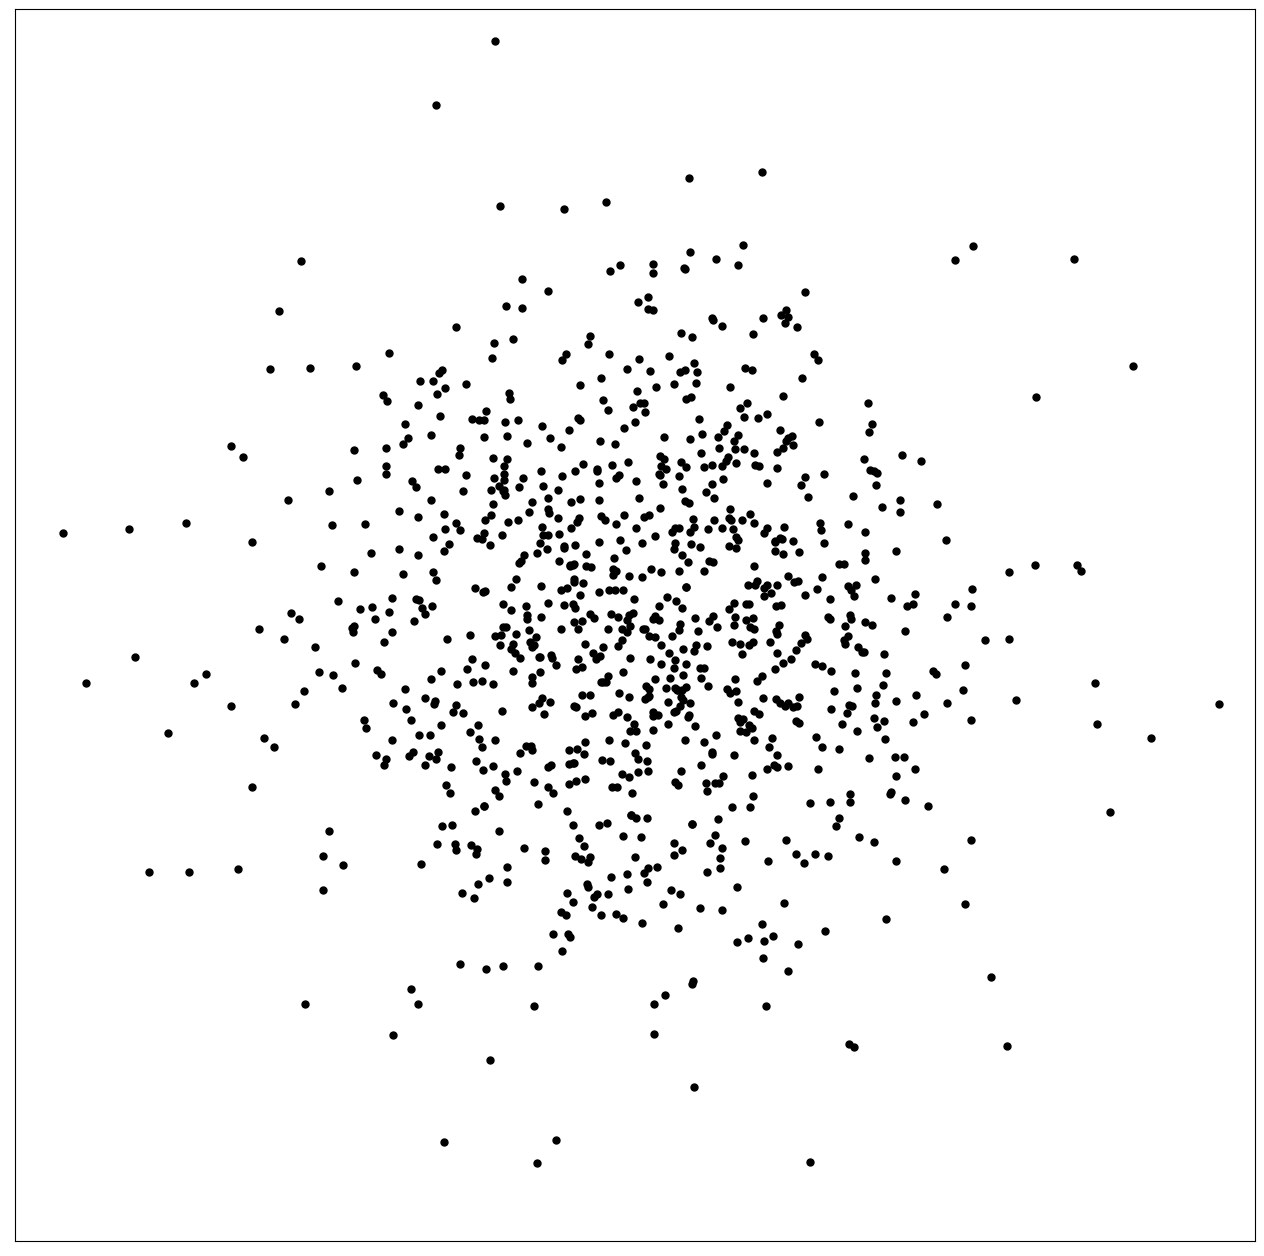

In [11]:
x = np.array([0, 0])
N = 1000
K = 1000
T = 100
t, h, B = BrownianTrajectories(x, N, K, T)

animateMB(t=t,
          B=B,
          figsize=(16, 16),
          showtrajectories=False,
          particle=True,
          labelvalues=False,
          xlabel=False,
          ylabel=False,
          labelfontsize=17,
          grid=False,
          color='blue',
          linewidth=1.5,
          blit=False,
          interval=20,
          name='2dGas',
          ext='gif',
          fps=60)

## Una trayectoria browniana en tiempo largo

MovieWriter ffmpeg unavailable; using Pillow instead.


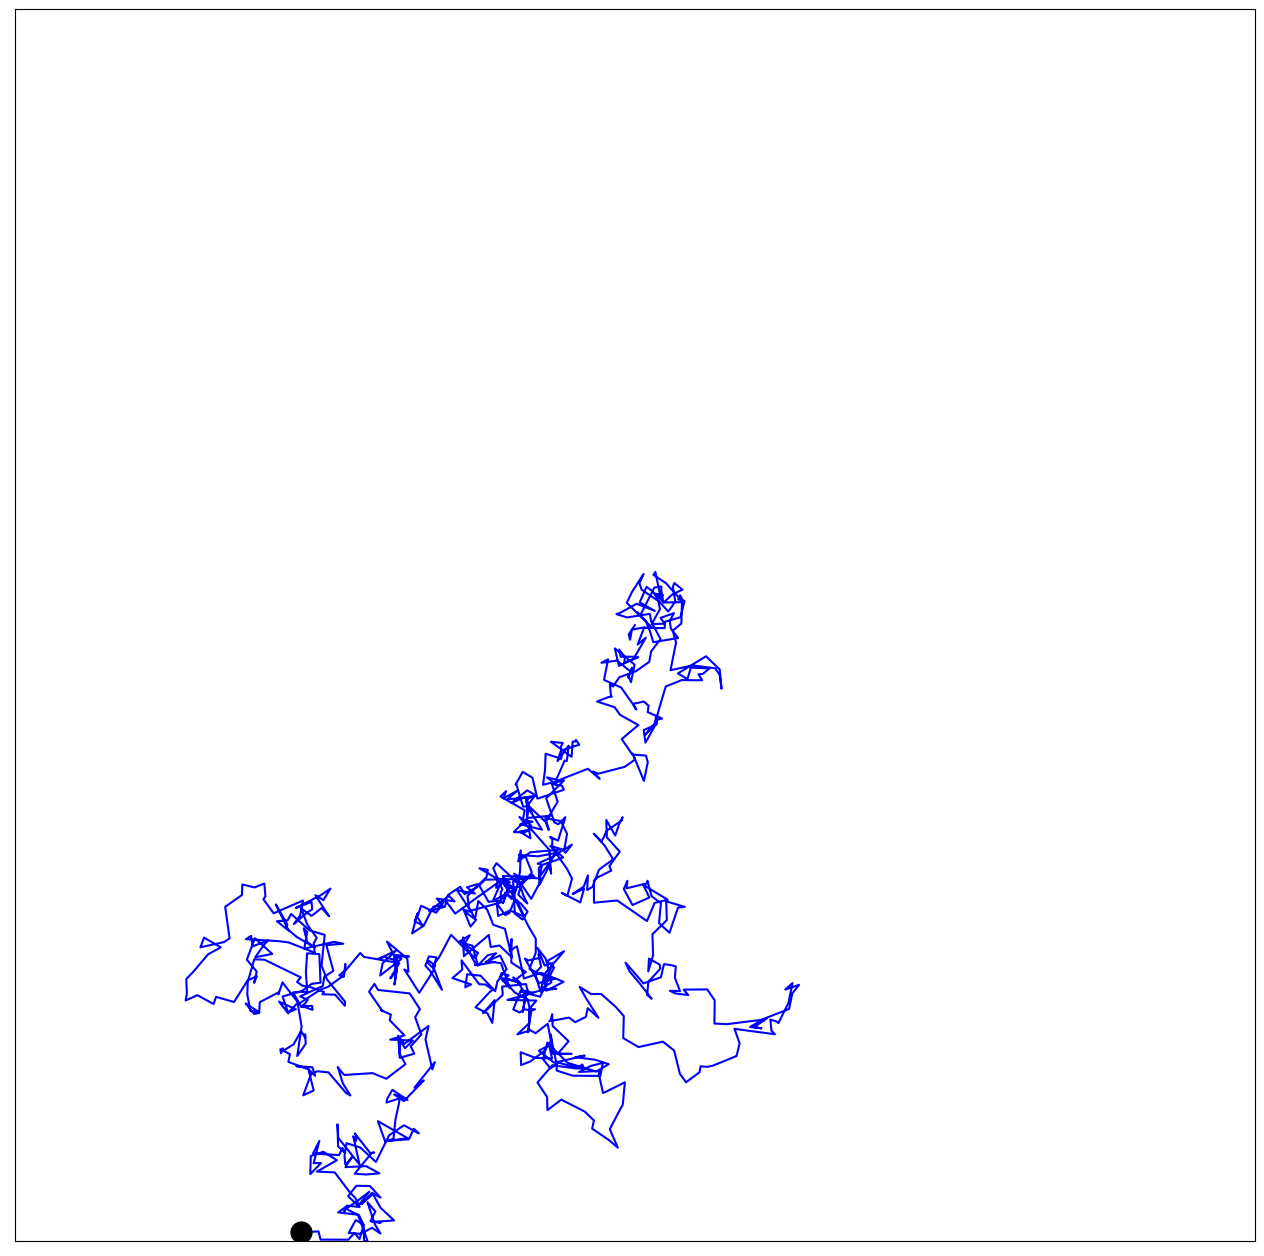

In [15]:
x = np.array([0, 0])
N = 1
K = 1000
T = 1
t, h, B = BrownianTrajectories(x, N, K, T)

animateMB(t=t,
          B=B,
          figsize=(16, 16),
          showtrajectories=True,
          particle=True,
          labelvalues=False,
          xlabel=False,
          ylabel=False,
          labelfontsize=17,
          grid=False,
          color='blue',
          linewidth=1.5,
          blit=False,
          interval=20,
          name='2DMB',
          ext='gif',
          fps=60)

# Fractalidad

In [13]:
np.random.seed(43)
x = np.array([0])
N = 1
K = 100000
a2s = np.flip(np.linspace(0.01, 1, 1000))
T = 1
t, h, B = BrownianTrajectories(x, N, K, T)

fig = plt.figure(figsize=(16, 9))
camera = Camera(fig)
for i, a2 in enumerate(a2s):
    plt.plot(t[:int(a2*len(t))], (1/np.sqrt(a2))*B[0, :int(a2*len(t)), 0], linewidth=1)
    plt.savefig('fractality-{}.png'.format(i))
    plt.clf()
    #camera.snap()
#anim = camera.animate(blit=False, interval=20)
#anim.save('Markov-property.gif', fps=60)

<Figure size 1600x900 with 0 Axes>

# Algunos sampleos

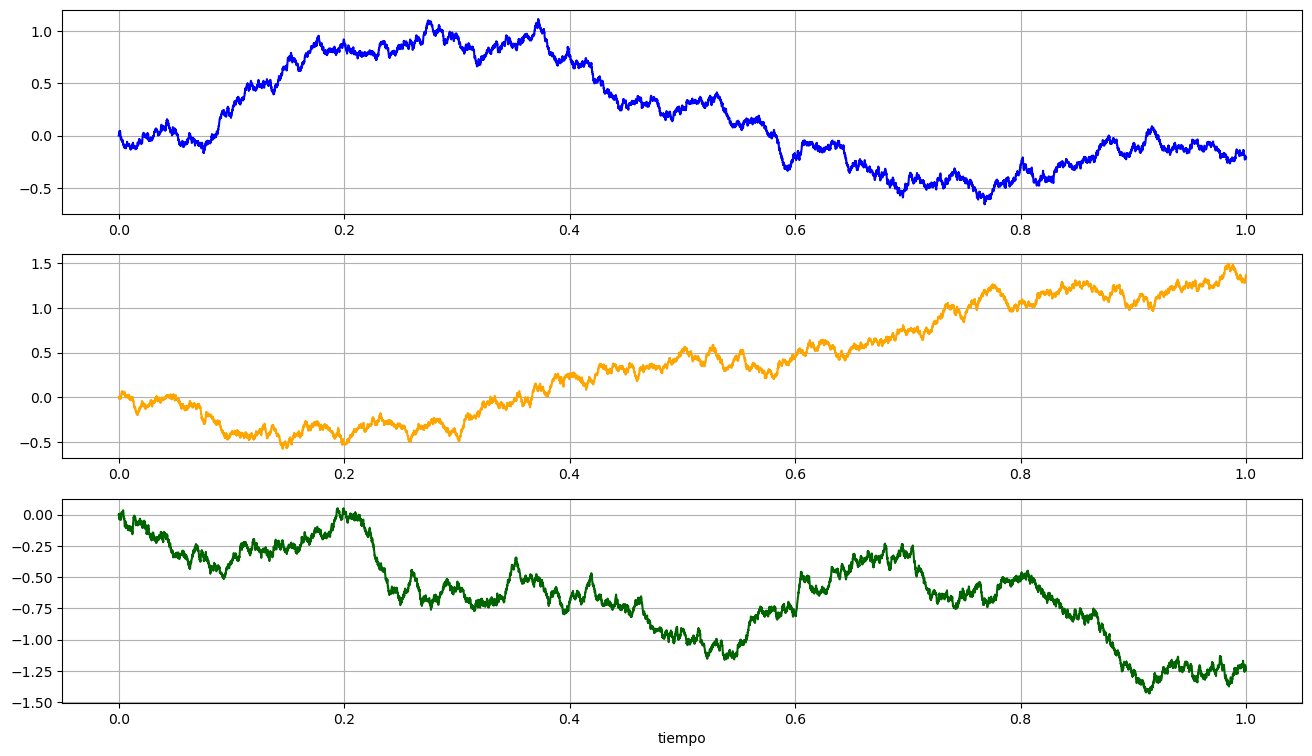

In [12]:
np.random.seed(42)
x = np.array([0])
N = 3
K = 10000
T = 1
t, h, B = BrownianTrajectories(x, N, K, T)

plt.figure(figsize=(16, 9))
plt.subplot(311)
plt.grid()
plt.plot(t, B[0, :, 0], color='blue')
plt.subplot(312)
plt.grid()
plt.plot(t, B[0, :, 1], color='orange')
plt.subplot(313)
plt.grid()
plt.plot(t, B[0, :, 2], color='darkgreen')
plt.xlabel('tiempo')
plt.savefig('samples1.png')
plt.show()

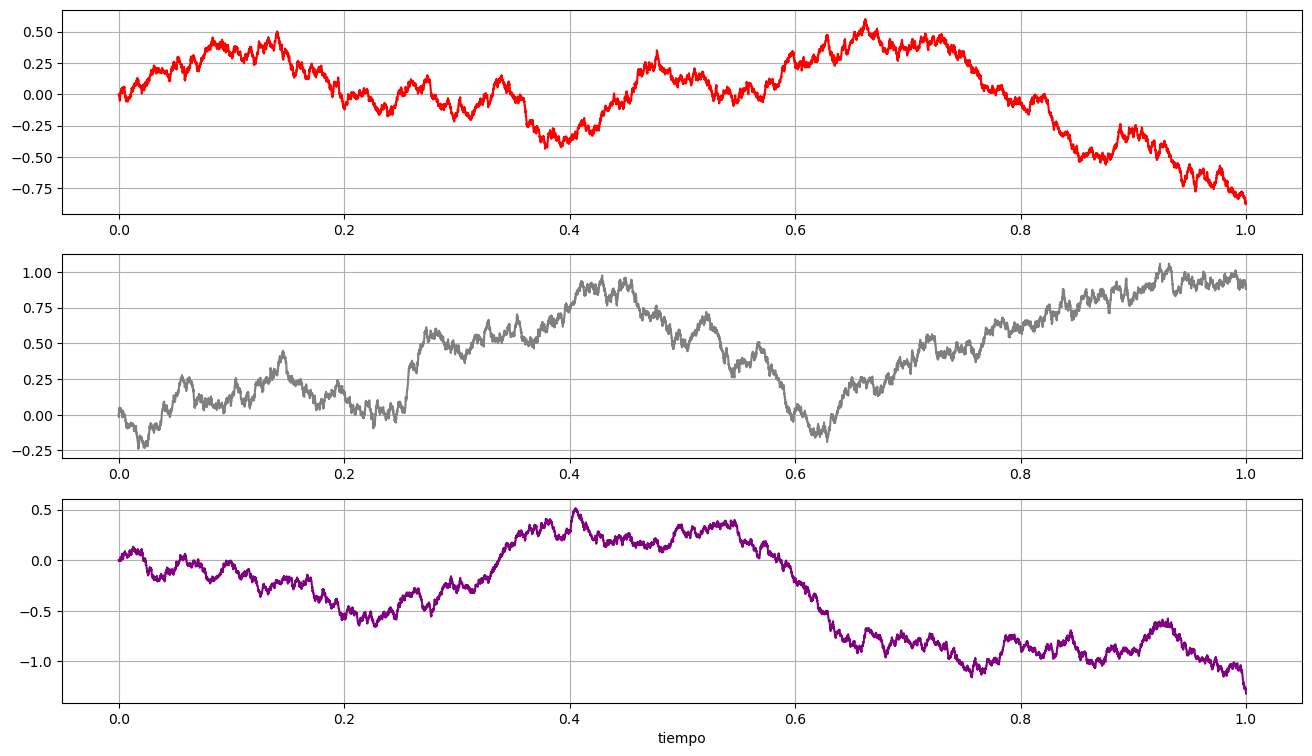

In [13]:
np.random.seed(9)
x = np.array([0])
N = 3
K = 10000
T = 1
t, h, B = BrownianTrajectories(x, N, K, T)

plt.figure(figsize=(16, 9))
plt.subplot(311)
plt.grid()
plt.plot(t, B[0, :, 0], color='red')
plt.subplot(312)
plt.grid()
plt.plot(t, B[0, :, 1], color='gray')
plt.subplot(313)
plt.grid()
plt.plot(t, B[0, :, 2], color='purple')
plt.xlabel('tiempo')
plt.savefig('samples2.png')
plt.show()